In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from scipy.stats import kstest
from sklearn.neighbors import NearestNeighbors

In [6]:
#read full dataframe

df =  pd.read_csv('../../Data/letter-recognition.data', sep=",", header=None, usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [7]:
letters = df[0]
df = df.drop(0, axis=1)

KstestResult(statistic=0.9075998680518208, pvalue=0.0)


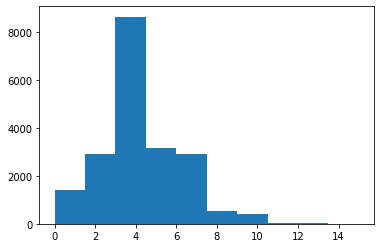

KstestResult(statistic=0.9028998680518208, pvalue=0.0)


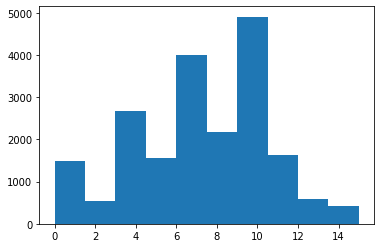

KstestResult(statistic=0.9482498680518208, pvalue=0.0)


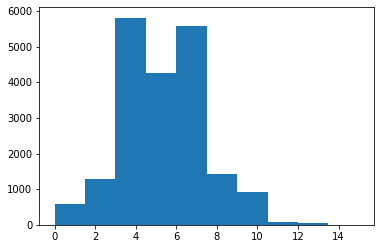

KstestResult(statistic=0.9148498680518208, pvalue=0.0)


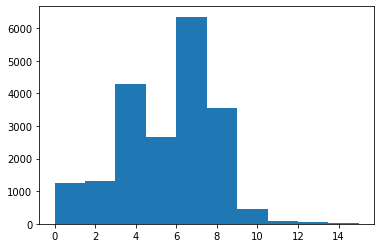

KstestResult(statistic=0.8138998680518208, pvalue=0.0)


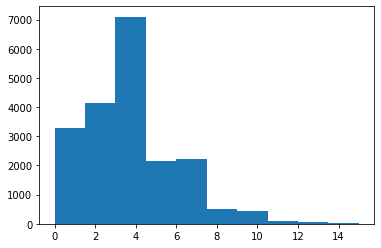

KstestResult(statistic=0.9739501019683698, pvalue=0.0)


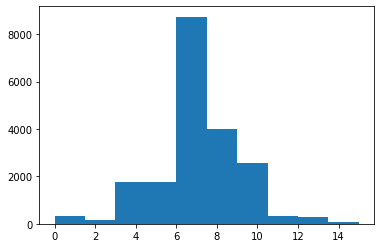

KstestResult(statistic=0.96995010196837, pvalue=0.0)


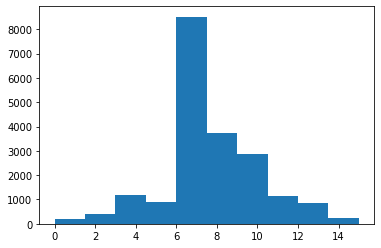

KstestResult(statistic=0.9019498680518208, pvalue=0.0)


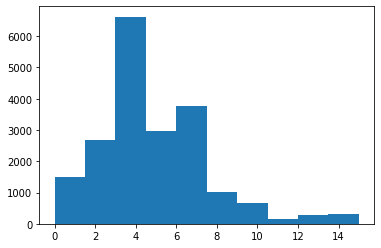

KstestResult(statistic=0.9226998680518208, pvalue=0.0)


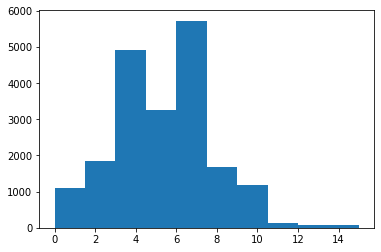

KstestResult(statistic=0.9834501019683699, pvalue=0.0)


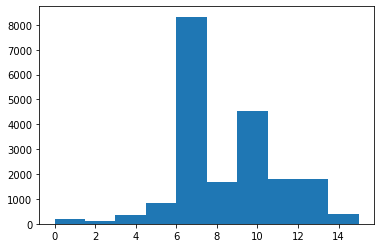

KstestResult(statistic=0.9463498680518208, pvalue=0.0)


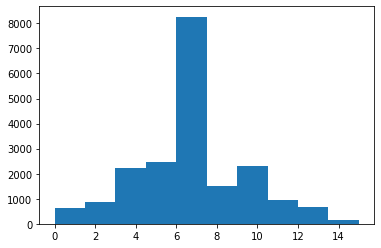

KstestResult(statistic=0.9948001019683699, pvalue=0.0)


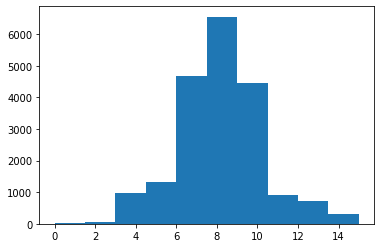

KstestResult(statistic=0.7257998680518207, pvalue=0.0)


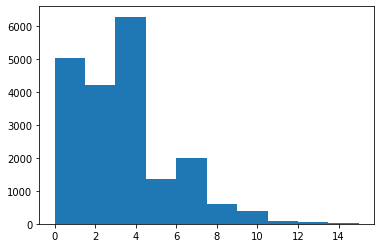

KstestResult(statistic=0.9971001019683698, pvalue=0.0)


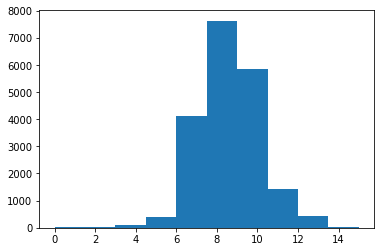

KstestResult(statistic=0.7516498680518208, pvalue=0.0)


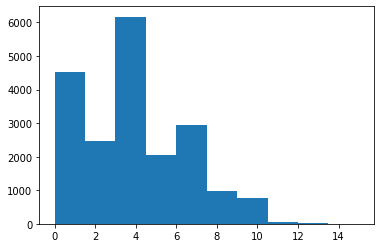

KstestResult(statistic=0.9962001019683699, pvalue=0.0)


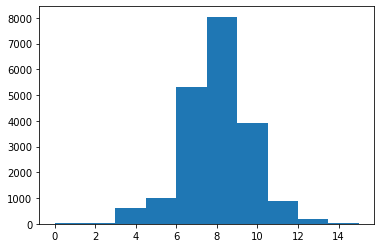

In [8]:
# test for gaussian distribution: kolmogorov-smirnov, histograms
for i in range(1,17):
    print(kstest(df[i], 'norm'))
    plt.hist(df[i])
    plt.show()
    
# Results show that the distribution of the data is not normal (p-value, histograms), thus, we cannot use PCA or other methods that assume normal distribution

In [9]:
#KNN (K-Nearest Neighbors) to determine the eps-value for the DBSCAN

neighbors = NearestNeighbors(n_neighbors=32)
neighbors_fit = neighbors.fit(df)
distances, indices = neighbors_fit.kneighbors(df)

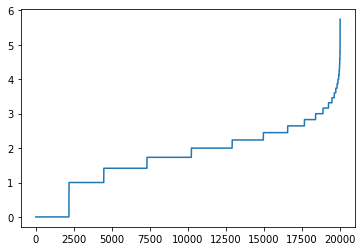

In [10]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [11]:
#DBSCAN
#min_samples = 2*Dimensions(=16) = 32
#eps = 3.9 (knee, after some testing, 3.9 produces the best results)
db = DBSCAN(eps=3.9, min_samples=32).fit(df)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#make copy of DF and then add new columns to it so we can rerun this code as much as we like
df1 = df.copy()
df1['cluster'] = labels
df1[0] = letters
print(n_clusters_, n_noise_)
df1

percent_outliers = n_noise_ / len(df1.index) * 100
print("Outliers: ", percent_outliers, "%")
#Cluster -1 is for the outliers.
#14 clusters, 3852 ouliers (19.26%)

14 3852
Outliers:  19.259999999999998 %


In [12]:
# show clusters and letter combinations
df2 = df1
pd.set_option('display.max_rows', 200)
df2.groupby(['cluster', 0]).size()

#Displays each cluster and how many units of each letter are included in the cluster. 
#As can be seen, cluster 0 is very big, while other clusters are very small. 

cluster  0
-1       A    158
         B     86
         C    116
         D    133
         E     88
         F    116
         G    144
         H    112
         I    127
         J    160
         K    169
         L    137
         M    297
         N    165
         O    110
         P    239
         Q    168
         R     86
         S    165
         T     87
         U    155
         V    129
         W    207
         X     99
         Y    232
         Z    167
 0       A     32
         B    680
         C    620
         D    672
         E    680
         F    627
         G    629
         H    431
         I    628
         J    417
         K    570
         L     95
         M    299
         N    407
         O    643
         P    414
         Q    615
         R    672
         S    579
         T    709
         U    452
         V    635
         W    502
         X    688
         Y    554
         Z    567
 1       A    599
         L      2
         S      4

A


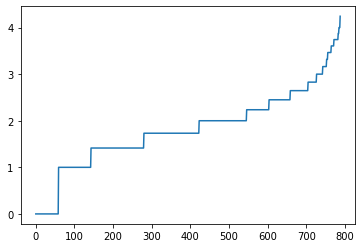

knee:  788 4.0
A 4 102
B


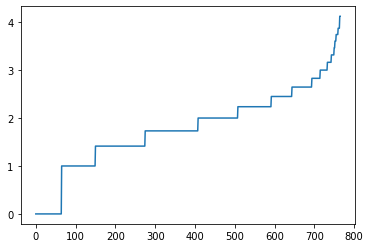

knee:  764 3.872983346207417
B 2 99
C


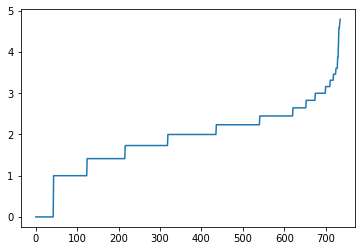

knee:  729 3.605551275463989
C 3 178
D


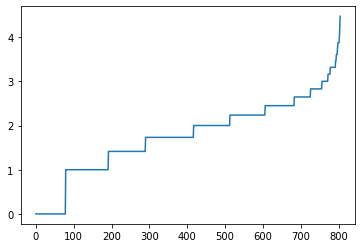

knee:  802 3.872983346207417
D 3 116
E


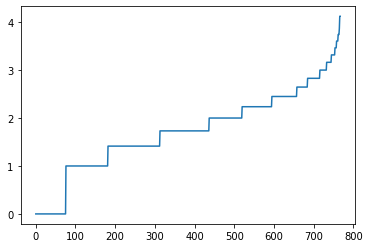

knee:  765 3.7416573867739413
E 7 99
F


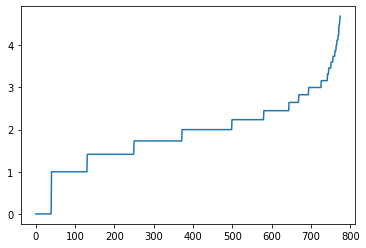

knee:  769 4.123105625617661
F 5 67
G


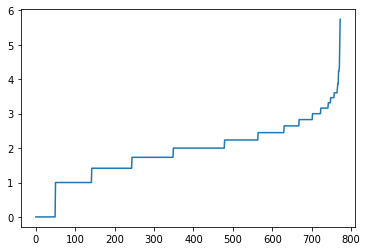

knee:  765 3.605551275463989
G 3 194
H


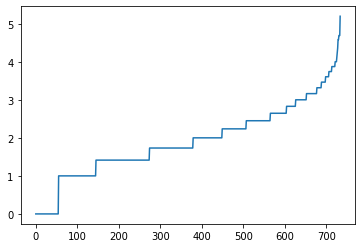

knee:  733 4.69041575982343
H 2 75
I


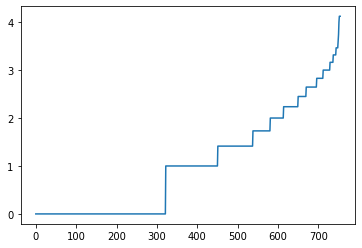

knee:  755 4.123105625617661
I 5 68
J


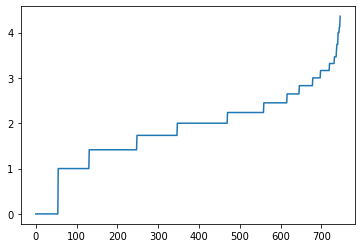

knee:  744 4.0
J 5 138
K


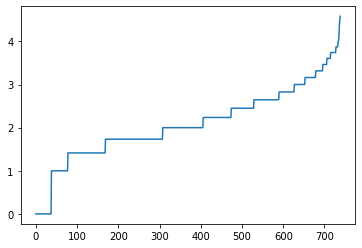

knee:  733 3.872983346207417
K 4 193
L


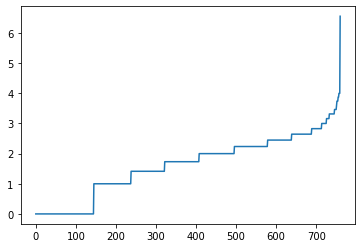

knee:  760 4.0
L 5 112
M


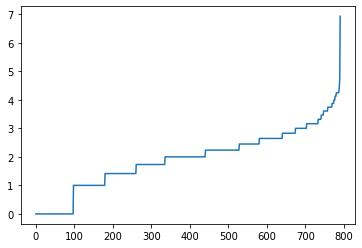

knee:  788 4.242640687119285
M 3 197
N


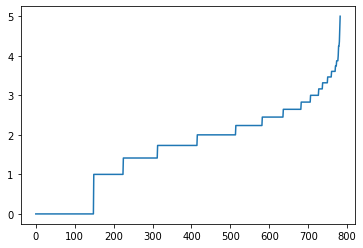

knee:  777 3.872983346207417
N 3 190
O


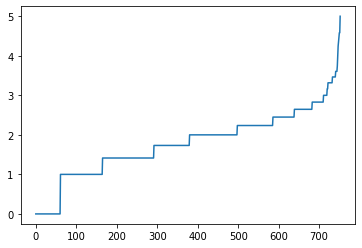

knee:  752 4.58257569495584
O 2 7
P


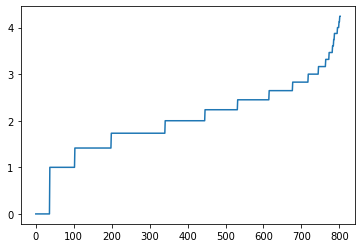

knee:  799 4.0
P 2 144
Q


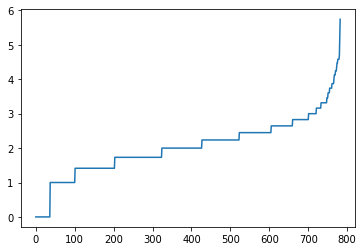

knee:  780 4.58257569495584
Q 3 46
R


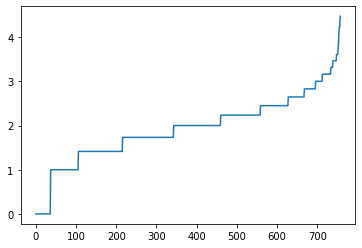

knee:  757 4.242640687119285
R 2 87
S


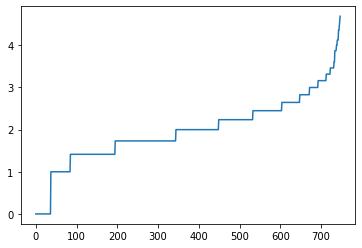

knee:  743 4.123105625617661
S 4 125
T


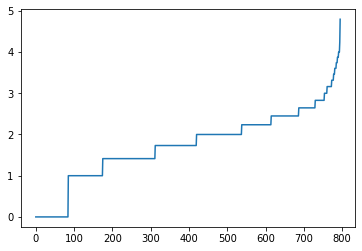

knee:  794 4.0
T 5 52
U


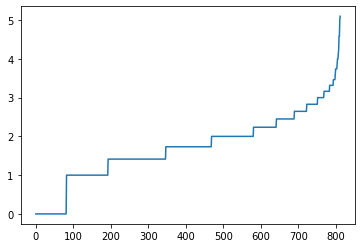

knee:  804 3.7416573867739413
U 5 170
V


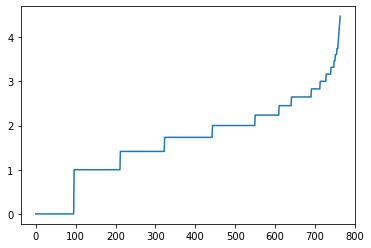

knee:  758 3.7416573867739413
V 4 133
W


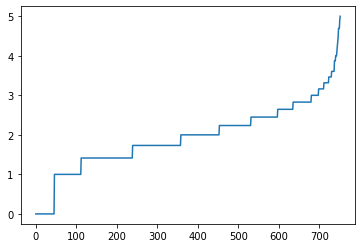

knee:  750 4.69041575982343
W 3 70
X


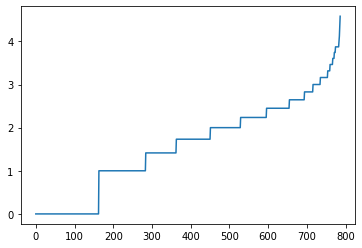

knee:  783 3.872983346207417
X 2 96
Y


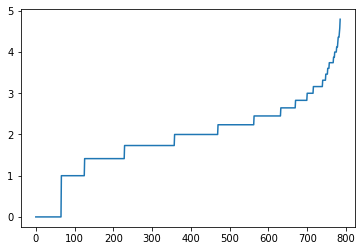

knee:  783 4.358898943540674
Y 4 130
Z


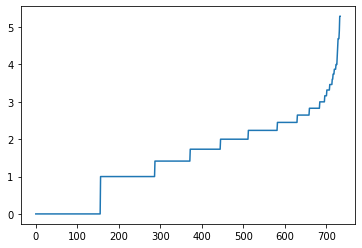

knee:  731 4.69041575982343
Z 4 29
Outliers:  14.585 %


In [13]:
#KNN (K-Nearest Neighbors) to determine the eps-value for the DBSCAN for each letter
#for ltr in range(65,91): loop through alphabet; 65=A, 66=B, ... 89=Y, 90=Z
num_outliers = 0

for ltr in range(65,91):
    ltr = chr(ltr)
    print(ltr)
    
    dfFiltered = df1[df1[0] == ltr]
    lettersFiltered = dfFiltered[0]
    dfFiltered = dfFiltered.drop(0, axis=1)
    dfFiltered = dfFiltered.drop('cluster', axis=1)

    neighbors = NearestNeighbors(n_neighbors=17)
    neighbors_fit = neighbors.fit(dfFiltered)
    distances, indices = neighbors_fit.kneighbors(dfFiltered)
    
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)
    plt.show()
    
    #calculates the knee (eps)
    from kneed import KneeLocator
    y = distances
    x = range(1, len(distances)+1)
    kn = KneeLocator(x, y, curve='convex', direction='increasing')
    print('knee: ', kn.knee, y[x.index(kn.knee)])
    
    #runs the DBSCAN for each letter with eps = knee and min_samples = 17 (D+1, which is the recommended minimum)
    dbFiltered = DBSCAN(eps=y[x.index(kn.knee)], min_samples=17).fit(dfFiltered)

    core_samples_mask = np.zeros_like(dbFiltered.labels_, dtype=bool)
    core_samples_mask[dbFiltered.core_sample_indices_] = True
    labelsFiltered = dbFiltered.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_Filtered = len(set(labelsFiltered)) - (1 if -1 in labelsFiltered else 0)
    n_noise_Filtered = list(labelsFiltered).count(-1)
    
    num_outliers += n_noise_Filtered

    #make copy of DF and then add new columns to it so we can rerun this code as much as we like
    df1Filtered = dfFiltered.copy()
    df1Filtered['cluster'] = labelsFiltered
    df1Filtered[0] = lettersFiltered
    print(ltr, n_clusters_Filtered, n_noise_Filtered)
    
percent_outliers = num_outliers / len(df1.index) * 100
print("Outliers: ", percent_outliers, "%")

#Returns with the knee value and graph, as well as the number of clusters and the number of outliers for each letter
#Final percentage of outliers for all letters together is 14.59%

In [14]:
# run dbscan for each letter and feature separately (not used for anything, just here in case we need it)
for ltr in range(65,91):
    ltr = chr(ltr)
    
    dfFiltered = df1[df1[0] == ltr]
    lettersFiltered = dfFiltered[0]
    dfFiltered = dfFiltered.drop(0, axis=1)
    dfFiltered = dfFiltered.drop('cluster', axis=1)

    #change feature and DBSCAN values here    
    dbFiltered = DBSCAN(eps=1, min_samples=20).fit(np.array(dfFiltered[12]).reshape(-1,1))

    core_samples_mask = np.zeros_like(dbFiltered.labels_, dtype=bool)
    core_samples_mask[dbFiltered.core_sample_indices_] = True
    labelsFiltered = dbFiltered.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_Filtered = len(set(labelsFiltered)) - (1 if -1 in labelsFiltered else 0)
    n_noise_Filtered = list(labelsFiltered).count(-1)

    #make copy of DF and then add new columns to it so we can rerun this code as much as we like
    df1Filtered = dfFiltered.copy()
    df1Filtered['cluster'] = labelsFiltered
    df1Filtered[0] = lettersFiltered
    print(ltr, n_clusters_Filtered, n_noise_Filtered)

A 1 0
B 1 0
C 1 0
D 1 3
E 1 0
F 1 0
G 1 0
H 1 0
I 1 5
J 1 0
K 1 0
L 1 0
M 1 0
N 1 0
O 1 0
P 1 0
Q 1 0
R 1 0
S 1 0
T 1 0
U 1 0
V 1 0
W 1 0
X 1 0
Y 1 0
Z 1 0
